# Lasso to select features

In [ ]:
!pip install scikit-learn==1.3.0

In [ ]:
import os
import pickle

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, PrecisionRecallDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
DATA_ROOT = 'Data/LastOnlyProcessed'

In [ ]:
SAVE_DIR = 'Model'

In [ ]:
DATA_SIZE = 'full'    # choose one in {small, medium, full}
DATA_TYPE = 'mixed'   # choose one in {standard, mixed, minmax}

In [ ]:
TRAIN = True

In [ ]:
if DATA_SIZE == 'full':
    X_train = np.load(os.path.join(DATA_ROOT, 'full', f'X_train_{DATA_TYPE}.npy'))
    y_train = np.load(os.path.join(DATA_ROOT, 'full', 'y_train.npy'))
else:
    X_train = np.load(os.path.join(DATA_ROOT, DATA_SIZE, f'X_train_{DATA_TYPE}_{DATA_SIZE}.npy'))
    y_train = np.load(os.path.join(DATA_ROOT, DATA_SIZE, f'y_train_{DATA_SIZE}.npy'))

# X_val = np.load(os.path.join(DATA_ROOT, 'full', f'X_val_{DATA_TYPE}.npy'))
# y_val = np.load(os.path.join(DATA_ROOT, 'full', 'y_val.npy'))
X_test = np.load(os.path.join(DATA_ROOT, 'full', f'X_test_{DATA_TYPE}.npy'))
y_test = np.load(os.path.join(DATA_ROOT, 'full', 'y_test.npy'))

In [ ]:
tol = 1e-4
max_iter=10000
n_fold = 5

In [ ]:
hyper_parameters = {'C': [10**x for x in range(-4, 5)]}

# Logistic Regression with L1 Penalty Using all features.

In [ ]:
logistic_regression = LogisticRegression(
    penalty='l1',
    dual=False,
    tol=tol,
    C=1.0,
    class_weight='balanced',
    random_state=0,
    # solver='saga',
    solver='liblinear',
    max_iter=max_iter,
    verbose=0,
    # n_jobs=-1
    n_jobs=1
)

In [ ]:
if TRAIN:
    clf = GridSearchCV(logistic_regression, hyper_parameters, n_jobs=-1, refit=True, cv=n_fold, verbose=3)
    clf.fit(X_train, y_train)
    os.makedirs(SAVE_DIR, exist_ok=True)
    with open(os.path.join(SAVE_DIR, f'lr_{DATA_TYPE}_{DATA_SIZE}_l1_all.pkl'), 'wb') as f:
        pickle.dump(clf, f, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(os.path.join(SAVE_DIR, f'lr_{DATA_TYPE}_{DATA_SIZE}_l1_all.pkl'), 'rb') as f:
        clf = pickle.load(f)

In [ ]:
clf.best_params_

{'C': 0.0001}

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_score = clf.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76    483593
           1       0.04      0.49      0.08     16407

    accuracy                           0.62    500000
   macro avg       0.51      0.55      0.42    500000
weighted avg       0.94      0.62      0.74    500000



In [ ]:
f1_score(y_test, y_pred)

0.07714482340428605

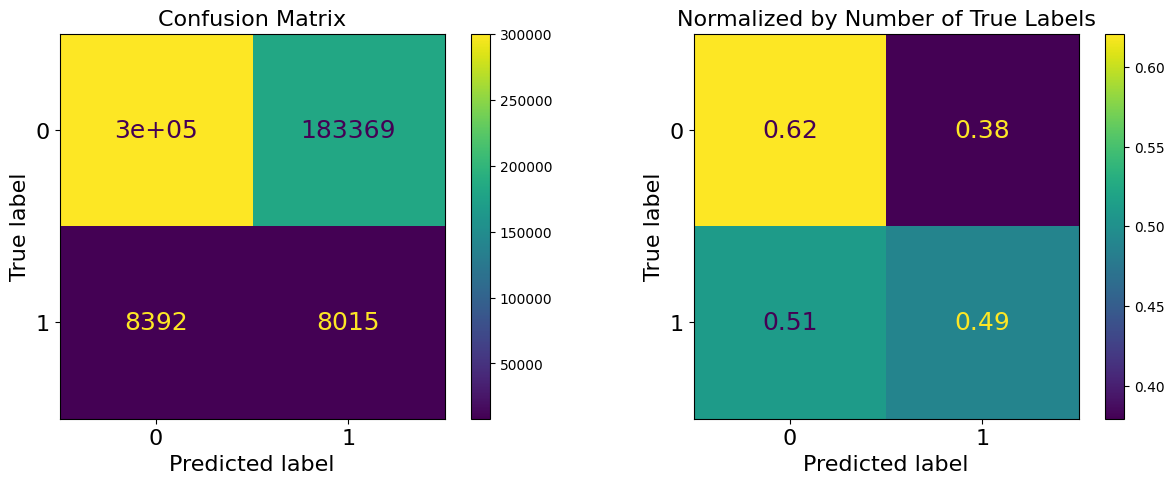

In [ ]:
fig1, (ax11, ax12) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax11, text_kw={'fontsize': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', ax=ax12, text_kw={'fontsize': 18})
ax11.set_title('Confusion Matrix', fontsize=16)
ax12.set_title('Normalized by Number of True Labels', fontsize=16)
ax11.xaxis.label.set_fontsize(16)
ax11.yaxis.label.set_fontsize(16)
ax11.tick_params(axis='both', which='major', labelsize=16)
ax12.xaxis.label.set_fontsize(16)
ax12.yaxis.label.set_fontsize(16)
ax12.tick_params(axis='both', which='major', labelsize=16)
plt.show()

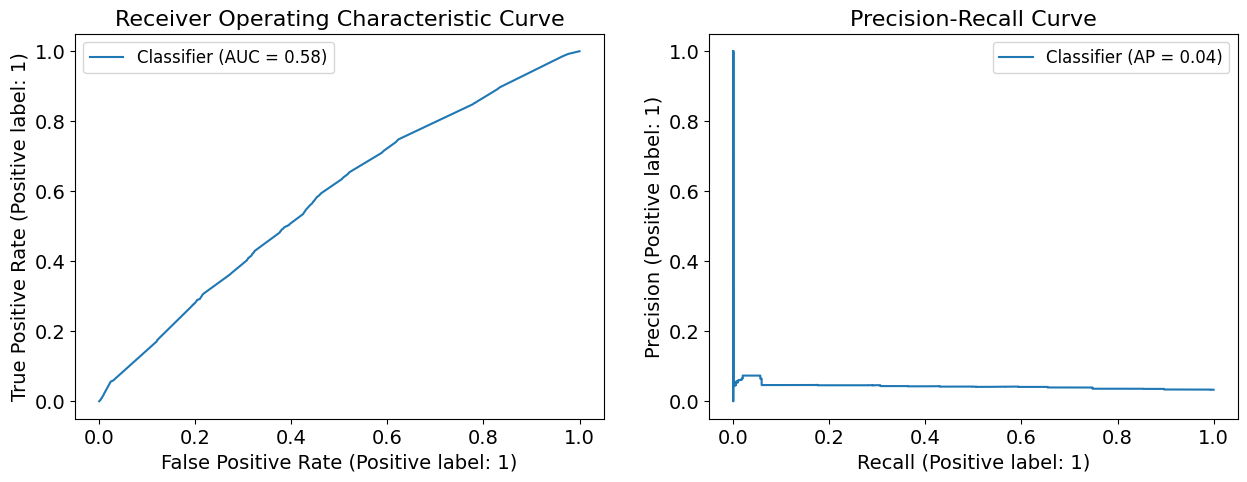

In [ ]:
fig2, (ax21, ax22) = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_predictions(y_test, y_score, ax=ax21)
PrecisionRecallDisplay.from_predictions(y_test, y_score, ax=ax22)
ax21.set_title('Receiver Operating Characteristic Curve', fontsize=16)
ax21.xaxis.label.set_fontsize(14)
ax21.yaxis.label.set_fontsize(14)
ax21.tick_params(axis='both', which='major', labelsize=14)
ax21.legend(fontsize=12)
ax22.set_title('Precision-Recall Curve', fontsize=16)
ax22.xaxis.label.set_fontsize(14)
ax22.yaxis.label.set_fontsize(14)
ax22.tick_params(axis='both', which='major', labelsize=14)
ax22.legend(fontsize=12)
plt.show()